Dataset: [Popular Anime Dataset (Kaggle)](https://www.kaggle.com/datasets/tanishksharma9905/top-popular-anime)

Objective: Predict the viewer rating (score) of an anime based on features like genre, number of episodes, airing status, studio, and popularity metrics.

In [156]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
#importing dataset
df=pd.read_csv("popular_anime.csv")

In [158]:
print("Shape of the dataset:")
print("Rows: ",df.shape[0])
print("columns:",df.shape[1])

Shape of the dataset:
Rows:  28825
columns: 18


In [159]:
#columns names
print("columns names:",df.columns.tolist())

columns names: ['id', 'name', 'genres', 'type', 'episodes', 'status', 'aired_from', 'aired_to', 'duration_per_ep', 'score', 'scored_by', 'rank', 'rating', 'studios', 'producers', 'image', 'trailer', 'synopsis']


In [160]:
#show first five rows
print("First five rows: \n",df.head())

First five rows: 
       id                              name                             genres  \
0  52991     Frieren: Beyond Journey's End          Adventure, Drama, Fantasy   
1   5114  Fullmetal Alchemist: Brotherhood  Action, Adventure, Drama, Fantasy   
2   9253                       Steins;Gate            Drama, Sci-Fi, Suspense   
3  38524   Attack on Titan Season 3 Part 2            Action, Drama, Suspense   
4  28977                  Gintama Season 4             Action, Comedy, Sci-Fi   

  type  episodes           status                 aired_from  \
0   TV      28.0  Finished Airing  2023-09-29T00:00:00+00:00   
1   TV      64.0  Finished Airing  2009-04-05T00:00:00+00:00   
2   TV      24.0  Finished Airing  2011-04-06T00:00:00+00:00   
3   TV      10.0  Finished Airing  2019-04-29T00:00:00+00:00   
4   TV      51.0  Finished Airing  2015-04-08T00:00:00+00:00   

                    aired_to duration_per_ep  score  scored_by  rank  \
0  2024-03-22T00:00:00+00:00   24 min

In [161]:
#last five rows 
print("Last five rows: ",df.tail())


Last five rows:            id                                               name  \
28820  16796                               Mujeokcheorin Rambot   
28821  48866         Hua Jianghu: Huan Shi Men Sheng 2nd Season   
28822  16790                                   Super Samchongsa   
28823  16788  Sengoku Bushou Retsuden Bakufuu Douji Hissatsuman   
28824  16784                                            Marin X   

                                 genres   type  episodes           status  \
28820                    Action, Sci-Fi  Movie       1.0  Finished Airing   
28821  Drama, Fantasy, Mystery, Romance    ONA      19.0  Finished Airing   
28822                    Action, Sci-Fi  Movie       1.0  Finished Airing   
28823                 Action, Adventure    OVA       3.0  Finished Airing   
28824         Action, Adventure, Sci-Fi  Movie       1.0  Finished Airing   

                      aired_from                   aired_to duration_per_ep  \
28820  1985-01-01T00:00:00+00:00      

In [162]:
#missing value
missing_value=df.isnull().sum()
print("Missing value: ",missing_value)
print("\n")
print("Data Types: ",df.dtypes)

Missing value:  id                     0
name                   0
genres              6069
type                  87
episodes             779
status                 0
aired_from           955
aired_to           17895
duration_per_ep        0
score              10226
scored_by          10226
rank                6863
rating               724
studios            11889
producers          15373
image                  0
trailer            23351
synopsis            5368
dtype: int64


Data Types:  id                   int64
name                object
genres              object
type                object
episodes           float64
status              object
aired_from          object
aired_to            object
duration_per_ep     object
score              float64
scored_by          float64
rank               float64
rating              object
studios             object
producers           object
image               object
trailer             object
synopsis            object
dtype: object


In [163]:
#summary statistics
print("Summary stats: ",df.describe()) # for numeraical features
print(df.describe(include='all')) # for full categorical columns(for both numerics and object-type columns)

Summary stats:                   id      episodes         score     scored_by          rank
count  28825.000000  28046.000000  18599.000000  1.859900e+04  21962.000000
mean   34131.945117     13.827462      6.397697  2.989163e+04  10522.959749
std    19617.957463     46.841239      0.889835  1.212973e+05   6386.404388
min        1.000000      1.000000      1.890000  1.010000e+02      0.000000
25%    15979.000000      1.000000      5.780000  3.400000e+02   4989.250000
50%    38070.000000      2.000000      6.370000  1.544000e+03  10462.500000
75%    51060.000000     13.000000      7.030000  1.009150e+04  16022.750000
max    61871.000000   3057.000000      9.300000  2.943048e+06  21729.000000
                  id              name  genres   type      episodes  \
count   28825.000000             28825   22756  28738  28046.000000   
unique           NaN             28350     935      9           NaN   
top              NaN  Spirit Guardians  Comedy     TV           NaN   
freq            

In [164]:
#droping rows with missing target columns and "Score" is our target variable
df = df.dropna(subset=['score', 'scored_by'])

In [165]:
#filling categorical columns with mode
cat_cols=['type','rating','status']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\skpum\AppData\Local\Temp\ipykernel_19100\1052544704.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [166]:
#filling numerical columns with median
num_cols = ['episodes', 'rank']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\skpum\AppData\Local\Temp\ipykernel_19100\2287337022.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [167]:
#filling text columns with Unknown
text_cols = ['genres', 'studios', 'producers', 'synopsis', 'trailer','aired_from','aired_to']
for col in text_cols:
    df[col].fillna("Unknown", inplace=True)


C:\Users\skpum\AppData\Local\Temp\ipykernel_19100\1615073986.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [168]:
print(df.isnull().sum())

id                 0
name               0
genres             0
type               0
episodes           0
status             0
aired_from         0
aired_to           0
duration_per_ep    0
score              0
scored_by          0
rank               0
rating             0
studios            0
producers          0
image              0
trailer            0
synopsis           0
dtype: int64


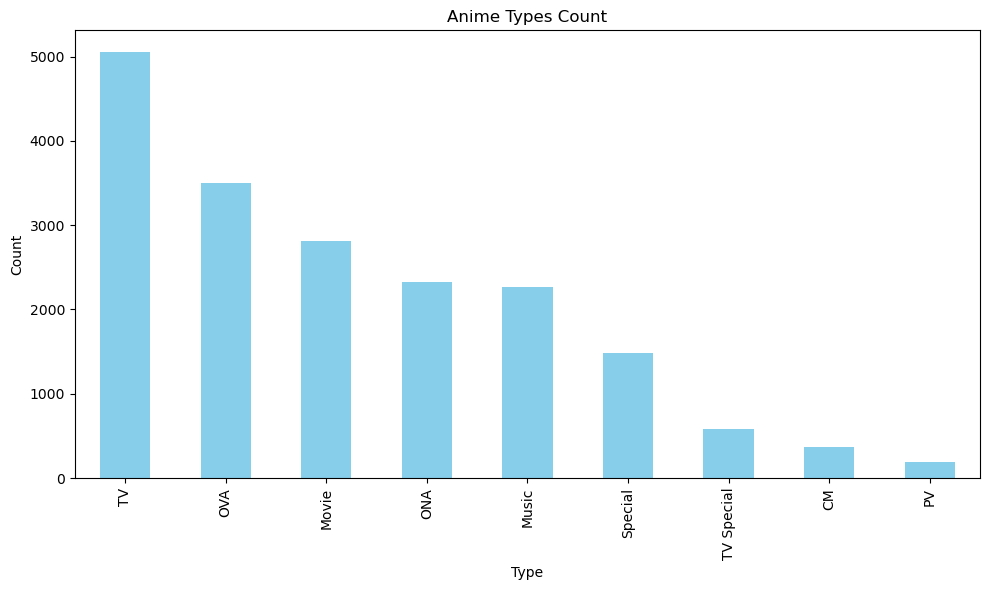

In [169]:
# Bar chart: Anime Types Count
plt.figure(figsize=(10, 6))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Anime Types Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

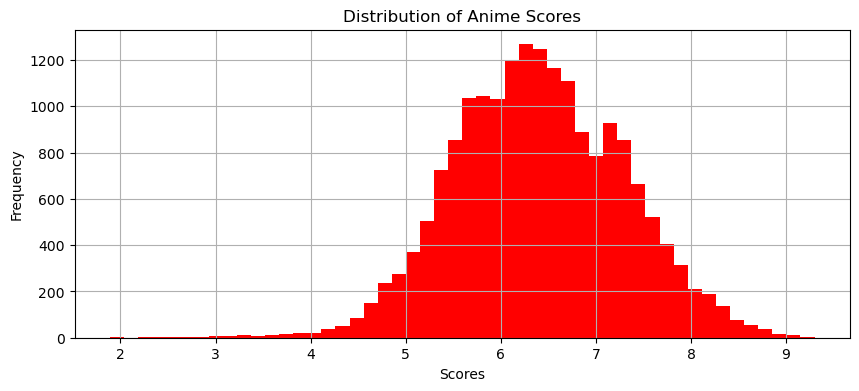

In [170]:
#Histogram of 'Scores'
plt.figure(figsize=(10,4))
df['score'].hist(bins=50,color='red')
plt.title("Distribution of Anime Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

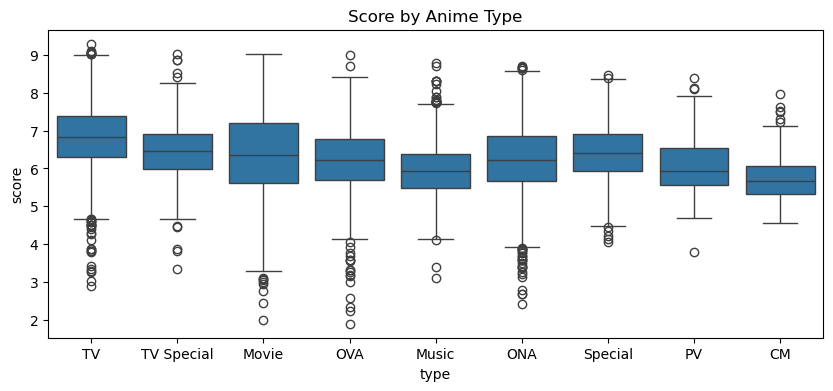

In [171]:
#box plot
plt.figure(figsize=(10,4))
sns.boxplot(x='type',y='score',data=df)
plt.title("Score by Anime Type")
plt.show()

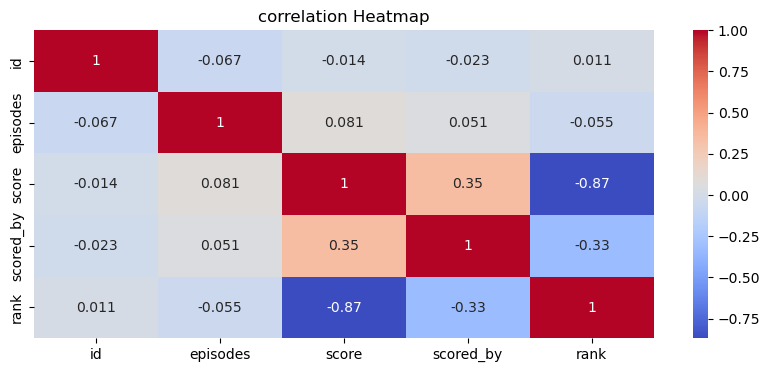

In [172]:
#heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

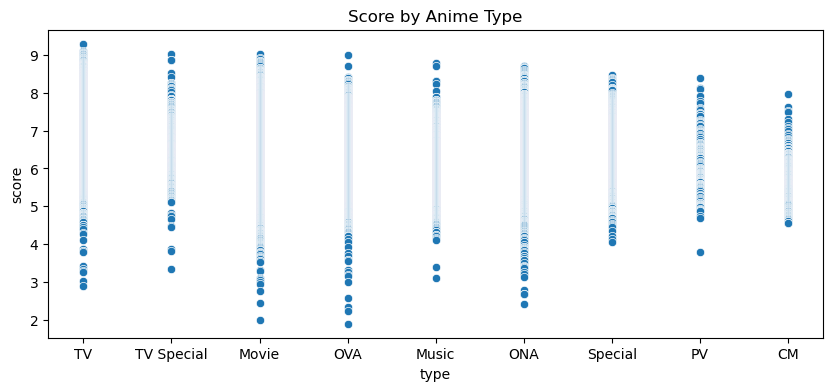

In [173]:
#ScatterPlot
plt.figure(figsize=(10,4))
sns.scatterplot(x='type',y='score',data=df)
plt.title("Score by Anime Type")
plt.show()

In [174]:
print(df.columns.tolist())

['id', 'name', 'genres', 'type', 'episodes', 'status', 'aired_from', 'aired_to', 'duration_per_ep', 'score', 'scored_by', 'rank', 'rating', 'studios', 'producers', 'image', 'trailer', 'synopsis']


In [175]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import pandas as pd
Original_shape = pd.read_csv("popular_anime.csv")

# Drop irrelevant columns
df = df.drop(columns=['title'], errors='ignore')

# One-Hot Encoding for 'type' and 'status'
for col in ['type', 'status']:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Handling 'genre' - MultiLabel One-Hot Encoding
if 'genre' in df.columns:
    df['genre'] = df['genre'].fillna('')  # handle missing
    df['genre_list'] = df['genre'].apply(lambda x: x.split(', '))
    mlb = MultiLabelBinarizer()
    genre_encoded = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)
    df = pd.concat([df.drop(['genre', 'genre_list'], axis=1), genre_encoded], axis=1)


In [176]:
print("Final columns after encoding:")
print(df.columns.tolist())


Final columns after encoding:
['id', 'name', 'genres', 'episodes', 'aired_from', 'aired_to', 'duration_per_ep', 'score', 'scored_by', 'rank', 'rating', 'studios', 'producers', 'image', 'trailer', 'synopsis', 'type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_PV', 'type_Special', 'type_TV', 'type_TV Special', 'status_Finished Airing']


In [177]:
print("Original Shape: ",Original_shape.shape)
print("encoded Shape: ",df.shape)

Original Shape:  (28825, 18)
encoded Shape:  (18599, 25)


In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

# Save original numerical data
df_before = df[numerical_cols].copy()

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Numerical Columns: ['id', 'episodes', 'score', 'scored_by', 'rank']


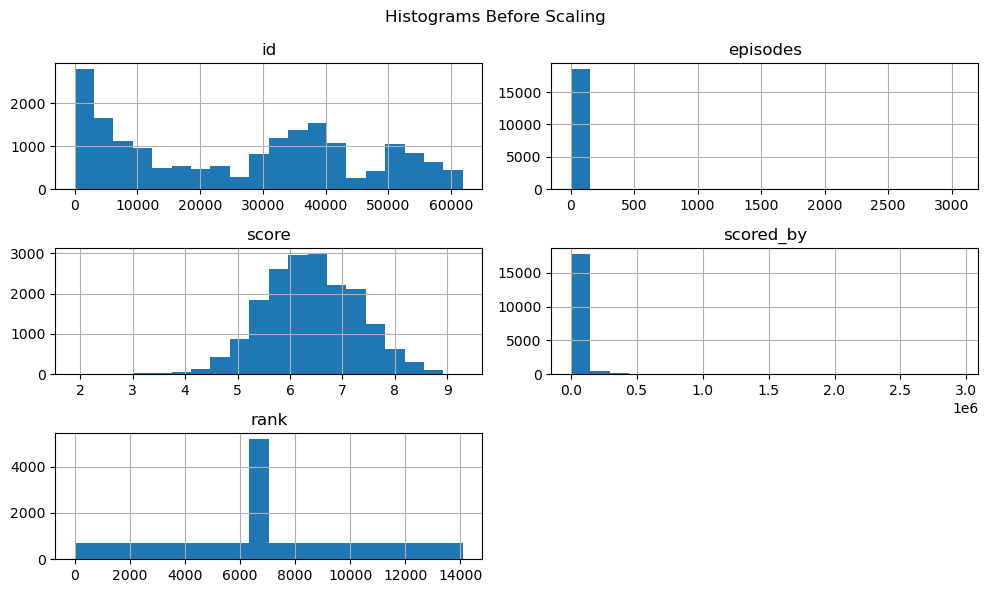

In [179]:
# Before Scaling - Histogram
df_before.hist(figsize=(10, 6), bins=20)
plt.suptitle("Histograms Before Scaling")
plt.tight_layout()
plt.show()

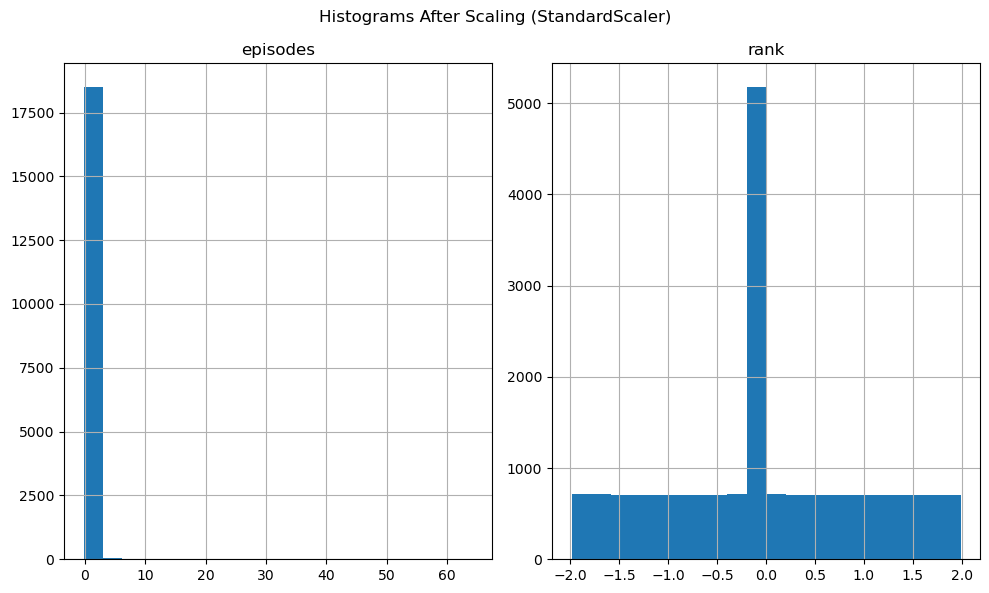

In [180]:
# After Scaling - Histogram
df[num_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("Histograms After Scaling (StandardScaler)")
plt.tight_layout()
plt.show()

In [181]:
from sklearn.preprocessing import MinMaxScaler

before_scaling = df[num_cols].copy()
# Apply MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

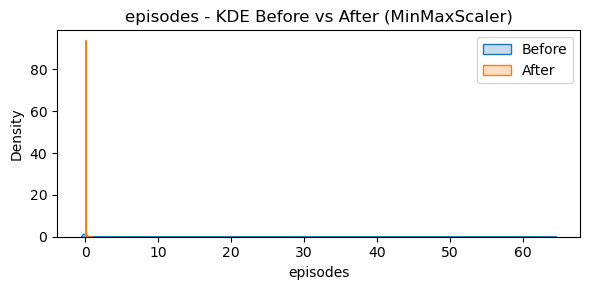

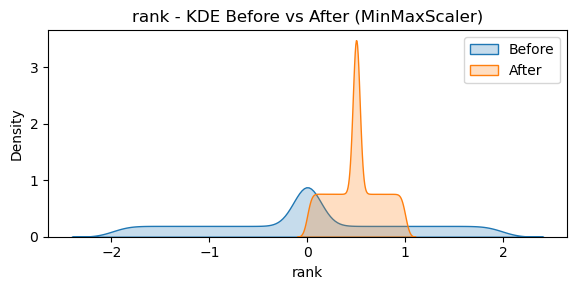

In [182]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(before_scaling[col], label='Before', fill=True)
    sns.kdeplot(df[col], label='After', fill=True)
    plt.title(f"{col} - KDE Before vs After (MinMaxScaler)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [183]:
from sklearn.model_selection import train_test_split

X = df.drop('score', axis=1) 
y = df['score'] 

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes
print("Training set: ",X_train.shape,y_train.shape)
print("Testing set: ",X_test.shape,y_test.shape)

Training set:  (14879, 24) (14879,)
Testing set:  (3720, 24) (3720,)


In [184]:
# model training & evaluation
"""Algorithm choosen: Random forest classifier
    I chose Random Forest Classifier because it’s an ensemble learning algorithm 
    that combines multiple decision trees to improve accuracy and prevent overfitting.
    It handles both numerical and categorical data well, requires minimal preprocessing,
    and performs efficiently on large datasets.
    It’s also robust to missing data and feature noise."""

'Algorithm choosen: Random forest classifier\n    I chose Random Forest Classifier because it’s an ensemble learning algorithm \n    that combines multiple decision trees to improve accuracy and prevent overfitting.\n    It handles both numerical and categorical data well, requires minimal preprocessing,\n    and performs efficiently on large datasets.\n    It’s also robust to missing data and feature noise.'

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("popular_anime.csv")

df_clean = df.select_dtypes(exclude='object').dropna()

# Converting 'score' into categories
def label_score(score):
    if score < 5:
        return 'Low'
    elif score < 7:
        return 'Medium'
    else:
        return 'High'

df_clean['score_class'] = df_clean['score'].apply(label_score)

# Features and Target
X = df_clean.drop(['score', 'score_class'], axis=1)
y = df_clean['score_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

Accuracy Score: 1.0


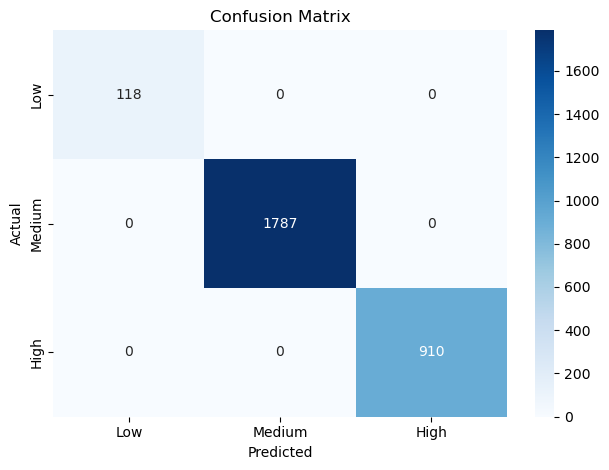

In [189]:
# Confusion Matrix and heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()